# Datasets processing

## Large scale BCI dataset

In [4]:
import os
import numpy as np
import pandas as pd

from scipy.io import loadmat

path = '/storage/Large_scale_BCI'

infos = {}
for file in os.listdir(path):
    if not file.endswith('.mat'): continue
    
    if '-' in file:
        task, subj_id, date = file.split('-')[:3]
    else:
        subj_idx, n = file.index('Subject'), len('Subject')
        task, subj_id, date = file[:subj_idx], file[subj_idx : subj_idx + n + 1], file[subj_idx + n + 1 : subj_idx + n + 7]

    if task != '5F': continue

    infos.setdefault(subj_id, {}).setdefault(task, []).append(date)

count = pd.DataFrame({subj : {t : len(d) for t, d in tasks.items()} for subj, tasks in infos.items()}).T
count.fillna(0, inplace = True)

print('Total sessions : {}'.format(np.sum(count.values)))
print(count.describe())
print(count.sum(axis = 1))
print(count.sum(axis = 0))
count

Total sessions : 19
             5F
count  8.000000
mean   2.375000
std    0.916125
min    1.000000
25%    2.000000
50%    2.000000
75%    3.000000
max    4.000000
SubjectA    2
SubjectB    4
SubjectC    2
SubjectE    3
SubjectF    3
SubjectG    2
SubjectH    1
SubjectI    2
dtype: int64
5F    19
dtype: int64


,5F
SubjectA,2
SubjectB,4
SubjectC,2
SubjectE,3
SubjectF,3
SubjectG,2
SubjectH,1
SubjectI,2


### Test with eeg_io

In [17]:
import os
import glob
import importlib
import numpy as np
import pandas as pd
import tensorflow as tf

from utils import is_equal
from datasets import get_dataset
from utils.eeg_utils import eeg_io

try:
    tf.config.set_visible_devices([], 'GPU')
except:
    pass

path = '/storage/Large_scale_BCI'

mat_file = glob.glob(path + '/*.mat')[0]

ds = get_dataset('large_scale_bci', subset = '5f', subjects = 'B')
print(ds.shape)
ds.head()

Loading dataset largescalebci...
(7663, 18)


,event_id,start,end,time,age,sex,meas_date,rate,channels,eeg,event_name,id,task,device,label,n_channels,dataset_name,session
0,0,2262,39638,37376,None,None,151110,200,"[Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, A1,...","[[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0...",passive,Large scale BCI-B,5f,EEG 1200,passive,22,Large scale BCI,Large scale BCI-B-151110
1,1,39638,39903,265,None,None,151110,200,"[Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, A1,...","[[-1.197e-05, -1.193e-05, -1.411e-05, -1.467e-...",thumb finger (IM),Large scale BCI-B,5f,EEG 1200,thumb finger (IM),22,Large scale BCI,Large scale BCI-B-151110
2,0,39903,40340,437,None,None,151110,200,"[Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, A1,...","[[1.043e-05, 8.99e-06, 8.6e-06, 6.38e-06, 5.22...",passive,Large scale BCI-B,5f,EEG 1200,passive,22,Large scale BCI,Large scale BCI-B-151110
3,2,40340,40600,260,None,None,151110,200,"[Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, A1,...","[[-8.99e-06, -8.87e-06, -8.93e-06, -1.087e-05,...",index finger (IM),Large scale BCI-B,5f,EEG 1200,index finger (IM),22,Large scale BCI,Large scale BCI-B-151110
4,0,40600,40961,361,None,None,151110,200,"[Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, A1,...","[[6.9e-07, 1.34e-06, 1.5e-07, -1.2e-07, -8.9e-...",passive,Large scale BCI-B,5f,EEG 1200,passive,22,Large scale BCI,Large scale BCI-B-151110


In [18]:
print(ds['meas_date'].unique())
ds

['151110' '160309' '160311' '160316']


,event_id,start,end,time,age,sex,meas_date,rate,channels,eeg,event_name,id,task,device,label,n_channels,dataset_name,session
0,0,2262,39638,37376,None,None,151110,200,"[Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, A1,...","[[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0...",passive,Large scale BCI-B,5f,EEG 1200,passive,22,Large scale BCI,Large scale BCI-B-151110
1,1,39638,39903,265,None,None,151110,200,"[Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, A1,...","[[-1.197e-05, -1.193e-05, -1.411e-05, -1.467e-...",thumb finger (IM),Large scale BCI-B,5f,EEG 1200,thumb finger (IM),22,Large scale BCI,Large scale BCI-B-151110
2,0,39903,40340,437,None,None,151110,200,"[Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, A1,...","[[1.043e-05, 8.99e-06, 8.6e-06, 6.38e-06, 5.22...",passive,Large scale BCI-B,5f,EEG 1200,passive,22,Large scale BCI,Large scale BCI-B-151110
3,2,40340,40600,260,None,None,151110,200,"[Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, A1,...","[[-8.99e-06, -8.87e-06, -8.93e-06, -1.087e-05,...",index finger (IM),Large scale BCI-B,5f,EEG 1200,index finger (IM),22,Large scale BCI,Large scale BCI-B-151110
4,0,40600,40961,361,None,None,151110,200,"[Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, A1,...","[[6.9e-07, 1.34e-06, 1.5e-07, -1.2e-07, -8.9e-...",passive,Large scale BCI-B,5f,EEG 1200,passive,22,Large scale BCI,Large scale BCI-B-151110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7658,0,717183,717608,425,None,None,160316,200,"[Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, A1,...","[[-1.007e-05, -8.87e-06, -8.69e-06, -8.76e-06,...",passive,Large scale BCI-B,5f,EEG 1200,passive,22,Large scale BCI,Large scale BCI-B-160316
7659,5,717608,717867,259,None,None,160316,200,"[Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, A1,...","[[-9.8e-07, -1.75e-06, -5.62e-06, -3.07e-06, -...",pinkie finger (IM),Large scale BCI-B,5f,EEG 1200,pinkie finger (IM),22,Large scale BCI,Large scale BCI-B-160316
7660,0,717867,718335,468,None,None,160316,200,"[Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, A1,...","[[-3.88e-06, -4.19e-06, -7.4e-07, 1.64e-06, -2...",passive,Large scale BCI-B,5f,EEG 1200,passive,22,Large scale BCI,Large scale BCI-B-160316
7661,5,718335,718593,258,None,None,160316,200,"[Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, A1,...","[[-1.95e-06, 6.74e-06, 5.29e-06, -5.41e-06, -8...",pinkie finger (IM),Large scale BCI-B,5f,EEG 1200,pinkie finger (IM),22,Large scale BCI,Large scale BCI-B-160316


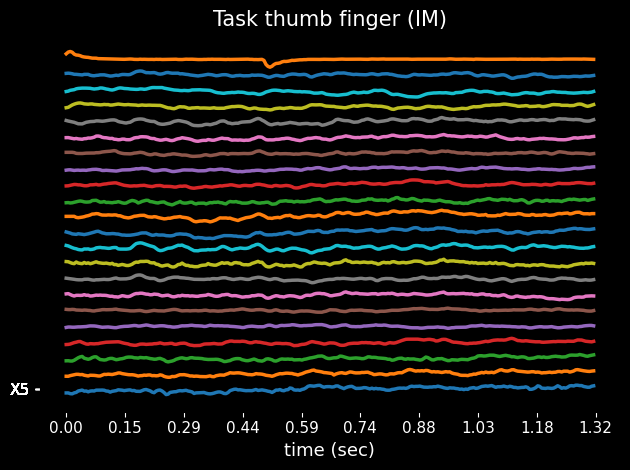

In [16]:
from utils import plot_audio

idx = 1

plot_audio(
    x = ds.iloc[idx]['eeg'],
    rate = ds.iloc[0]['rate'],
    channels = ds.iloc[0]['channels'],
    title = 'Task {}'.format(ds.iloc[idx]['label'])
)

In [ ]:
import json
import shutil
import logging
import importlib
import numpy as np
import pandas as pd
import tensorflow as tf

from utils import *
from models import *
from custom_train_objects.generators import EEGGrouperGenerator

logger = logging.getLogger(__name__)

set_display_options()

